# Imports

In [10]:
base_dir = '/media/bigdata/projects/pytau'
import sys
sys.path.append(base_dir)
from pytau.changepoint_io import FitHandler, DatabaseHandler
from pytau.changepoint_analysis import PklHandler
import pylab as plt
from pytau.utils import plotting
from glob import glob
import os

# Deal with paths

In [11]:
# Write to MODEL_SAVE_DIR.params
pytau_base_dir = '/home/abuzarmahmood/Downloads/pytau/'
param_file_path = f'{pytau_base_dir}/pytau/config/MODEL_SAVE_DIR.params'
save_model_path = f'{pytau_base_dir}/pytau/how_to/examples/saved_models'
with open(param_file_path, 'w') as f:
    f.write(save_model_path)

In [12]:
# Find hf5 file
h5_path_list = glob(os.path.join(pytau_base_dir, '**', 'AM*.h5'), recursive=True)

# Find or Download data

In [13]:
download_script_path = os.path.join(pytau_base_dir, 'pytau/how_to/scripts/download_test_data.sh')
if not len(h5_path_list):
    os.system(f'bash {download_script_path}')
    h5_path = glob(os.path.join(pytau_base_dir, '**', 'AM*.h5'), recursive=True)[0]
else:
    h5_path = h5_path_list[0]

In [14]:
h5_path

'/home/abuzarmahmood/Downloads/pytau/pytau/how_to/test_data/AM11_4Tastes_191030_114043_spike_trains_only/AM11_4Tastes_191030_114043_minimal.h5'

In [15]:
data_dir = os.path.dirname(h5_path)

# Perform Analyses

In [16]:
# Specify params for fit
model_parameters = dict(
    states=4,
    fit=40000,
    samples=20000,
    model_kwargs={'None': None},
        )

preprocess_parameters = dict(
    time_lims=[2000, 4000],
    bin_width=50,
    data_transform='None',  # Can also be 'spike_shuffled','trial_shuffled'
    )

FitHandler_kwargs = dict(
    data_dir=data_dir,
    taste_num= 0,
    region_name= 'all',  # Should match specification in info file or 'all'
    laser_type=None,
    experiment_name= 'pytau_test',
    )

In [17]:
## Initialize handler, and feed paramters
handler = FitHandler(**FitHandler_kwargs)
handler.set_model_params(**model_parameters)
handler.set_preprocess_params(**preprocess_parameters)

0 rows found with all NA, removing...
MODEL_PARAMS will have to be set
PREPROCESS_PARAMS will have to be set
Set model params to: {'states': 4, 'fit': 40000, 'samples': 20000, 'model_kwargs': {'None': None}}
Set preprocess params to: {'time_lims': [2000, 4000], 'bin_width': 50, 'data_transform': 'None'}


In [18]:
handler.run_inference()
handler.save_fit_output()

Loading spike trains from AM11_4Tastes_191030_114043_spike_trains_only, dig_in 0, laser None
Preprocessing spike trains, preprocessing func: <preprocess_single_taste>
Generating Model, model func: <single_taste_poisson>
Running inference, inference func: <advi_fit>


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 22,162


Saving inference output to : 
/media/bigdata/projects/pytau/pytau/how_to/examples/saved_models/pytau_test



### Look at inference outputs

In [19]:
handler.inference_outs.keys()

dict_keys(['model', 'approx', 'lambda', 'tau', 'data'])

In [20]:
# infernece_outs contains following attributes
# model : Model structure
# approx : Fitted model
# lambda : Inferred firing rates for each state
# tau : Inferred changepoints
# data : Data used for inference

# Load data from saved output

In [21]:
fit_database = DatabaseHandler()
fit_database.drop_duplicates()
fit_database.clear_mismatched_paths()

0 rows found with all NA, removing...
Removing 0 duplicate rows
0 mismatches from database
0 mismatches from files
==== Clearing Completed ====


In [22]:
# Get fits for a particular experiment
dframe = fit_database.fit_database
wanted_exp_name = 'pytau_test'
wanted_frame = dframe.loc[dframe['exp.exp_name'] == wanted_exp_name] 
# Pull out a single data_directory
pkl_path = wanted_frame['exp.save_path'].iloc[0]

In [23]:
wanted_frame.T

,0,0
preprocess.time_lims,"[2000, 4000]","[2000, 4000]"
preprocess.bin_width,50,50
preprocess.data_transform,None,None
preprocess.preprocessor_name,preprocess_single_taste,preprocess_single_taste
model.states,4,4
model.fit,40000,40000
model.samples,20000,20000
model.model_kwargs,{'None': None},{'None': None}
model.model_template_name,single_taste_poisson,single_taste_poisson
model.inference_func_name,advi_fit,advi_fit


In [24]:
wanted_frame['data.data_dir'].iloc[0]

'/media/bigdata/projects/pytau/pytau/how_to/notebooks/test_data/AM11_4Tastes_191030_114043_spike_trains_only'

In [25]:
# Load data
this_handler = PklHandler(pkl_path)

/home/abuzarmahmood/anaconda3/envs/pytau_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [26]:
# Can access following attributes
# Tau:
#   Raw Int tau : All tau samples in terms of indices of array given ==> this_handler.tau.raw_int_tau
#   Raw mode tau : Mode of samples in terms of indices of array given ==> this_handler.tau.raw_mode_tau
#   Scaled Tau : All tau samples scaled to stimulus delivery ==> this_handler.tau.scaled_tau
#   Int Scaled Tau : Integer values of "Scaled Tau" ==> this_handler.tau.scaled_int_tau
#   Mode Scale Tau : Mode of Int Scaled Tau ==> this_handler.tau.scaled_mode_tau
# Firing:
#   Raw spikes : Pulled using EphysData ==> this_handler.firing.raw_spikes 
#   Mean firing rate per state : this_handler.firing.state_firing
#   Snippets around each transition : this_handler.firing.transition_snips
#   Significance of changes in state firing : this_handler.firing.anova_p_val_array
#   Significance of changes in firing across transitions : this_handler.firing.pairwise_p_val_array

In [27]:
dir(this_handler)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_model',
 '_model_structure',
 'data',
 'dir_name',
 'file_name_base',
 'firing',
 'lambda_array',
 'metadata',
 'pkl_file_path',
 'pretty_metadata',
 'processed_spikes',
 'tau',
 'tau_array']

In [28]:
this_handler.pretty_metadata

,0
preprocess.time_lims,"[2000, 4000]"
preprocess.bin_width,50
preprocess.data_transform,None
preprocess.preprocessor_name,preprocess_single_taste
model.states,4
model.fit,40000
model.samples,20000
model.model_kwargs.None,None
model.model_template_name,single_taste_poisson
model.inference_func_name,advi_fit


In [29]:
this_handler.tau.scaled_mode_tau

array([[3552, 3679, 3937],
       [2886, 2927, 2961],
       [3257, 3315, 3350],
       [3032, 3064, 3079],
       [3082, 3149, 3939],
       [2218, 2691, 2780],
       [2675, 2991, 3492],
       [2669, 2932, 3022],
       [2441, 3113, 3205],
       [2727, 3484, 3631],
       [2304, 3077, 3143],
       [2306, 2960, 3040],
       [2444, 2573, 2694],
       [2108, 3545, 3947],
       [2770, 2938, 3935],
       [2607, 3091, 3947],
       [2242, 2338, 3341],
       [2482, 2629, 3945],
       [2453, 2779, 3502],
       [2383, 2447, 3923],
       [2179, 2583, 3753],
       [2406, 2945, 3948],
       [2066, 2711, 3118],
       [2023, 3342, 3499],
       [2952, 3057, 3721],
       [2394, 2898, 2966],
       [2122, 3144, 3209],
       [2037, 3606, 3791],
       [2057, 3104, 3940],
       [2020, 3830, 3946]])

# Plotting

In [30]:
fit_model = this_handler.data['model_data']['approx']
spike_train = this_handler.firing.raw_spikes
scaled_mode_tau = this_handler.tau.scaled_mode_tau

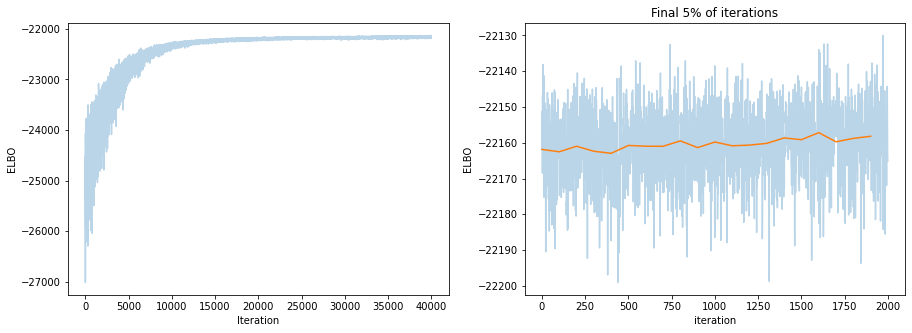

In [31]:
# Plot ELBO over iterations, should be flat by the end
fig, ax = plotting.plot_elbo_history(fit_model)
plt.show()

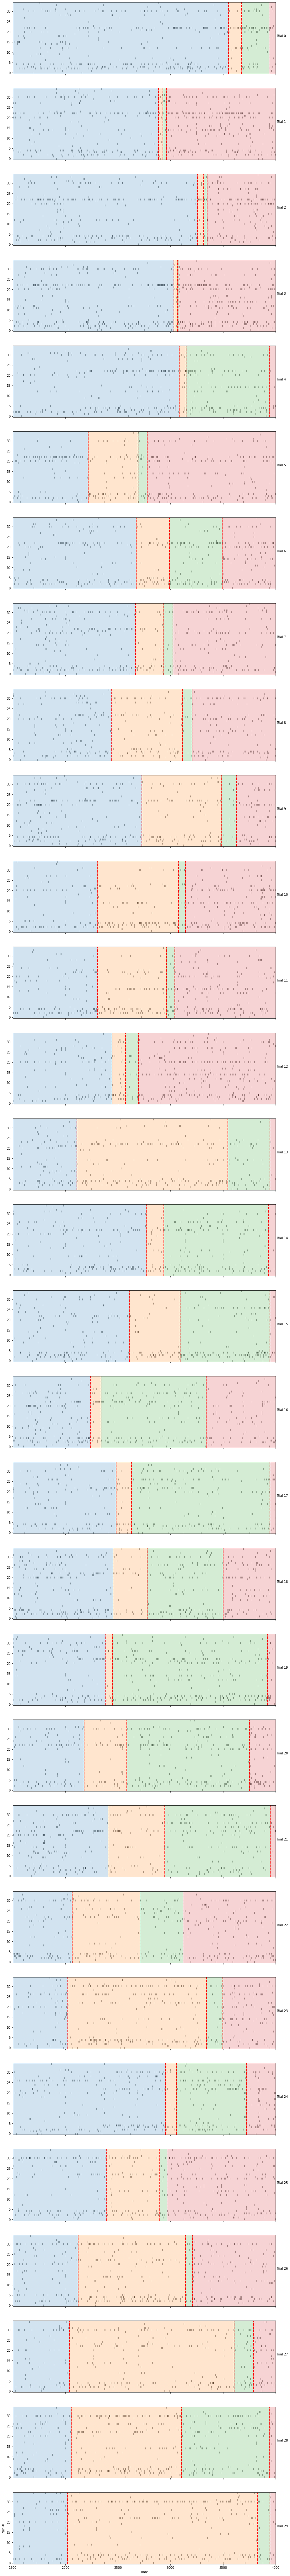

In [32]:
# Overlay raster plot with states
fig, ax = plotting.plot_changepoint_raster(
    spike_train, scaled_mode_tau, [1500, 4000])
plt.show()

/media/bigdata/projects/pytau/pytau/utils/plotting.py:119: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(np.arange(plot_lims[1]), np.arange(n_trials), state_durations)


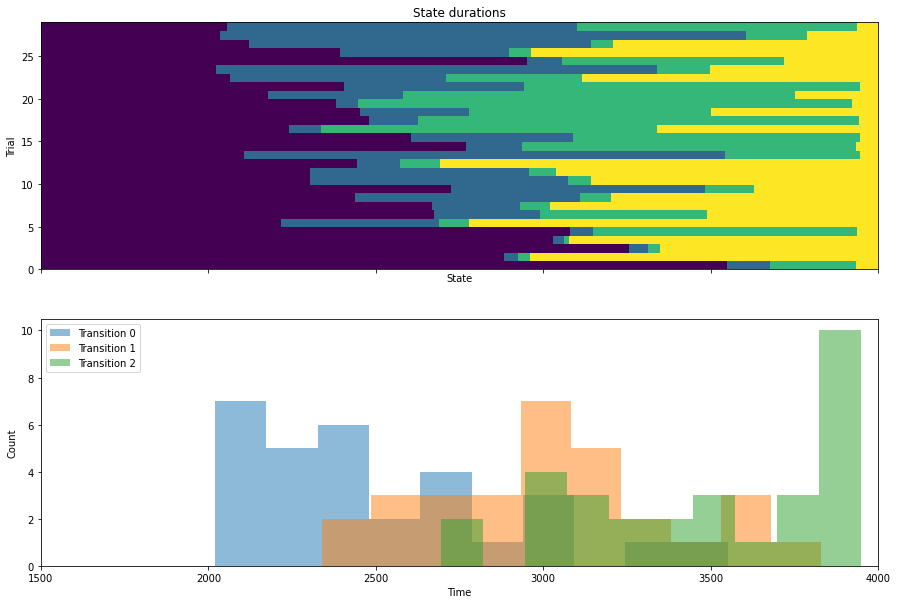

In [33]:
# Overview of changepoint positions
fig, ax = plotting.plot_changepoint_overview(scaled_mode_tau, [1500, 4000])
plt.show()

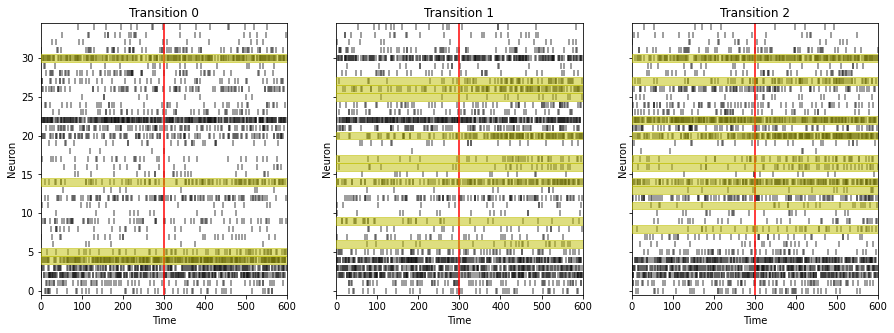

In [34]:
# Aligned spiking
fig, ax = plotting.plot_aligned_state_firing(spike_train, scaled_mode_tau, 300)
plt.show()

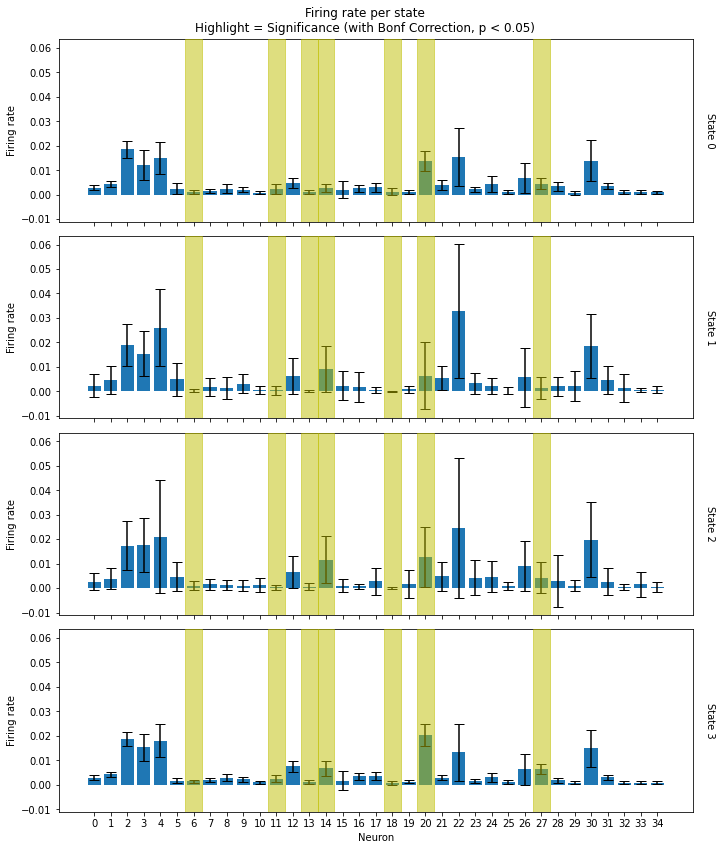

In [35]:
# Plot mean firing rates per state
fig, ax = plotting.plot_state_firing_rates(spike_train, scaled_mode_tau)
plt.show()